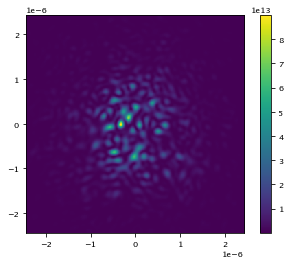

In [6]:
import sys
sys.path.append("..")
from hcipy.hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

D_tel = 8.2 # meter
wavelength = 1e-6 # meter
p = 512

pupil_grid = make_pupil_grid(p, D_tel)
focal_grid = make_focal_grid_from_pupil_grid(pupil_grid, 8, 20, wavelength=wavelength)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = circular_aperture(D_tel)(pupil_grid)

fried_parameter = 0.2 # meter
outer_scale = 20 # meter
velocity = 10 # meter/sec

Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

wf = Wavefront(aperture, wavelength)
img = prop(layer(wf)).reshape(p,p)

def center_of_mass(f):
    # takes in a Field, returns its CM.
    # rewriting because there seem to be weird bugs with the scipy inbuilt
    s = f.grid.shape[0]
    x, y = (n.flatten() for n in np.meshgrid(np.linspace(1, s+1, s), np.linspace(1, s+1, s)))
    return np.array((sum(f*x), sum(f*y)))/sum(f)

subgrid = make_pupil_grid(p//2, D_tel/2)

pixel_intensities = [center_of_mass(Field(quad.flatten()) for quad in (img[:p//2, :p//2], 
                                                       img[p//2:, :p//2], 
                                                       img[:p//2, p//2:], 
                                                       img[p//2:, p//2:])]
